In [27]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터셋 인스턴스 생성

data = pd.read_csv("C:\\Users\\piak6\\Downloads\\diabetes.csv")  # CSV 파일 경로

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
X = data.drop('BMI', axis=1).values
y = data['BMI'].values.astype(np.float32)

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# TensorDataset으로 래핑
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # y를 2D 텐서로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # y를 2D 텐서로 변환

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)
y_test_tensor.shape

torch.Size([231, 1])

In [21]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
model.train()
train_losses = []
epochs = 60
for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

Epoch 1, Loss: 1073.8208
Epoch 2, Loss: 1039.3093
Epoch 3, Loss: 987.6589
Epoch 4, Loss: 904.9809
Epoch 5, Loss: 789.0350
Epoch 6, Loss: 638.8104
Epoch 7, Loss: 463.6802
Epoch 8, Loss: 299.5341
Epoch 9, Loss: 178.1843
Epoch 10, Loss: 117.4874
Epoch 11, Loss: 95.4778
Epoch 12, Loss: 85.2677
Epoch 13, Loss: 78.7018
Epoch 14, Loss: 74.7838
Epoch 15, Loss: 70.9994
Epoch 16, Loss: 68.0007
Epoch 17, Loss: 64.9242
Epoch 18, Loss: 62.4598
Epoch 19, Loss: 61.3410
Epoch 20, Loss: 58.7654
Epoch 21, Loss: 56.5262
Epoch 22, Loss: 55.2364
Epoch 23, Loss: 53.9947
Epoch 24, Loss: 52.9194
Epoch 25, Loss: 51.9085
Epoch 26, Loss: 50.8234
Epoch 27, Loss: 49.3193
Epoch 28, Loss: 48.5913
Epoch 29, Loss: 47.9769
Epoch 30, Loss: 47.4186
Epoch 31, Loss: 46.4818
Epoch 32, Loss: 45.1274
Epoch 33, Loss: 44.9359
Epoch 34, Loss: 44.2462
Epoch 35, Loss: 43.4017
Epoch 36, Loss: 42.8048
Epoch 37, Loss: 42.2407
Epoch 38, Loss: 41.5554
Epoch 39, Loss: 41.2273
Epoch 40, Loss: 40.5936
Epoch 41, Loss: 40.3204
Epoch 42, Los

In [29]:
# 평가
model.eval()
preds, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
r2_score = r2_score(actuals, preds)
print(f"R^2 Score: {r2_score:.4f}")
print(f"Test MSE: {mse:.4f}")

R^2 Score: 0.1839
Test MSE: 58.3498


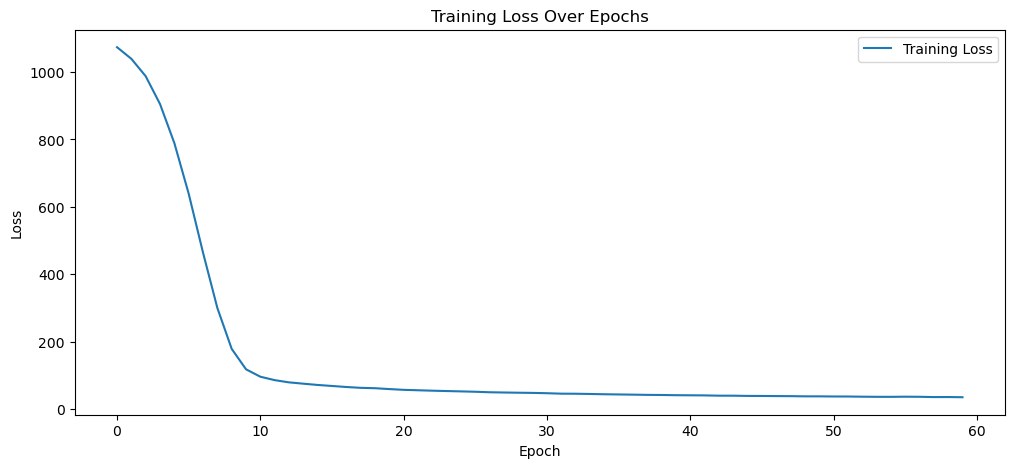

In [31]:
import matplotlib.pyplot as plt
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()